In [1]:
from math import sin, cos, pi, sqrt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x):
    return 2*cos(x-2)

In [3]:
x0 = -2
xn = 2
N = 30
m=10

In [4]:
h = (xn-x0)/N

In [5]:
x=[]
y=[]

x0_h = -2
while x0_h <= xn:
    x.append(x0_h)
    y.append(f(x0_h))
    x0_h = round(x0_h + h, 3)

y

[-1.3072872417272239,
 -1.4964584680638422,
 -1.6591978378029757,
 -1.7926308951708696,
 -1.8944008200398825,
 -1.9627100563017221,
 -1.996352061993688,
 -1.994732620377342,
 -1.9578803355532883,
 -1.8864461272286537,
 -1.7816917335611528,
 -1.6454674251533228,
 -1.4801793238333127,
 -1.288746903468656,
 -1.074551423473611,
 -0.8413762058259566,
 -0.5933398104767241,
 -0.3348232894716218,
 -0.07039280469025608,
 0.19528102399859204,
 0.4575056156169192,
 0.7116493128552129,
 0.953223190759045,
 1.1779603443425963,
 1.38189125467673,
 1.5614139022648936,
 1.713357389298483,
 1.8350379470355629,
 1.9243063390479618,
 1.9795858230560144,
 1.9999000008333305]

In [6]:
A = [0] * (m+1)
B = [[0] * (m + 1) for _ in range(m + 1)]
C = [0] * (m+1)

In [7]:
def B_massive(B,X, n, m):
    for k in range(m + 1):
        for j in range(m + 1):
            B[k][j] = 0
            for i in range(n):

                B[k][j] += pow(X[i],k+j)

B_massive(B,x,N,m)

In [8]:
def C_massive(C, X, F, n, m):
    for j in range(m + 1):
        C[j] = 0
        for i in range(n):
            C[j] += F[i] * pow(X[i],j)

C_massive(C,x,y,N,m)
C

[-13.16745324126209,
 46.64875727045199,
 -9.002218462453317,
 100.13912435602413,
 -20.305490086900907,
 267.2692988447448,
 -70.61266195872552,
 794.655893242648,
 -279.48494618724584,
 2521.240001414218,
 -1142.4136185927064]

In [9]:
def Gause_method(A, B, X, m):
    for k in range(m):
        p = max(range(k, m + 1), key=lambda i: abs(A[i][k]))
        if p != k:
            A[k], A[p] = A[p], A[k]
            B[k], B[p] = B[p], B[k]
        for i in range(k + 1, m + 1):
            t = A[i][k] / A[k][k]
            A[i][k:] = [x - t * y for x, y in zip(A[i][k:], A[k][k:])]
            B[i] -= t * B[k]
    X[m] = B[m] / A[m][m]
    for k in range(m - 1, -1, -1):
        X[k] = (B[k] - sum(A[k][j] * X[j] for j in range(k + 1, m + 1))) / A[k][k]

In [10]:
Gause_method(B, C, A, m)

In [11]:
def eps(xi, phi, A, x):
    f_x = np.polyval(np.flip(A), x)
    return np.abs(f_x - f(x))
x_p=2
eps(x,y,A,x_p)

2.0547234789169977e-06

In [12]:
def Apr_MN(A, x, m):
    sum_val = 0.0
    for j in range(m + 1):
        sum_val += A[j] * pow(x,j)
    return sum_val

In [13]:
def dyspersion(X, A, n, m):
    sum_val = 0
    for i in range(n + 1):
        sum_val += (f(X[i]) - Apr_MN(A, X[i], m)) ** 2
    return sqrt(sum_val / (n + 1))

In [14]:
dyspersion(x, A, N, m)

3.193039417443655e-07

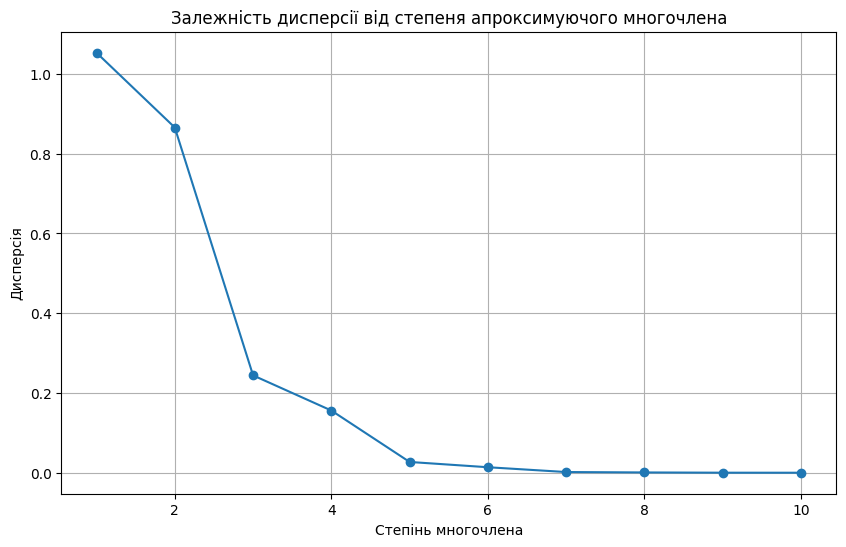

In [15]:
dysp_values = []
m_values = []
for m in range(1, 11):
    m_values.append(m)
    dysp_val = dyspersion(x, A, N, m)
    dysp_values.append(dysp_val)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), dysp_values, marker='o')
plt.xlabel('Степінь многочлена')
plt.ylabel('Дисперсія')
plt.title('Залежність дисперсії від степеня апроксимуючого многочлена')
plt.grid(True)
plt.show()